In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

from __future__ import absolute_import, division, print_function
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.pyplot import GridSpec
import seaborn as sns
import numpy as np
import pandas as pd
import os, sys
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')
sns.set_context("poster", font_scale=1.3)

import missingno as msno
import pandas_profiling

from sklearn.datasets import make_blobs
import time

In [2]:
tidy_players = pd.read_csv('tidy_players.csv.gz', compression = 'gzip', encoding = 'UTF8', index_col = 'playerShort')
tidy_dyads = pd.read_csv('tidy_dyads.csv.gz', compression = 'gzip', encoding = 'UTF8', index_col =['refNum', 'playerShort'])
referees = pd.read_csv('referees.csv.gz', compression = 'gzip', encoding = 'UTF8')
countries = pd.read_csv('countries.csv.gz', compression = 'gzip', encoding = 'UTF8')


In [3]:
clean_referees = (referees.reset_index()[referees.reset_index()
                                                 .refNum.isin(tidy_dyads.reset_index().refNum
                                                                                       .unique())
                                        ]).set_index('refNum')

In [4]:
clean_referees.shape, referees.shape

((2978, 2), (3147, 2))

In [5]:
clean_countries = (countries.reset_index()[countries.reset_index()
                                           .refCountry
                                           .isin(clean_referees.refCountry
                                                 .unique())
                                          ].set_index('refCountry'))

In [6]:
clean_countries.shape, countries.shape

((160, 8), (161, 8))

In [7]:
#How many games has each player played in?
games = tidy_dyads.groupby(level =1).count()

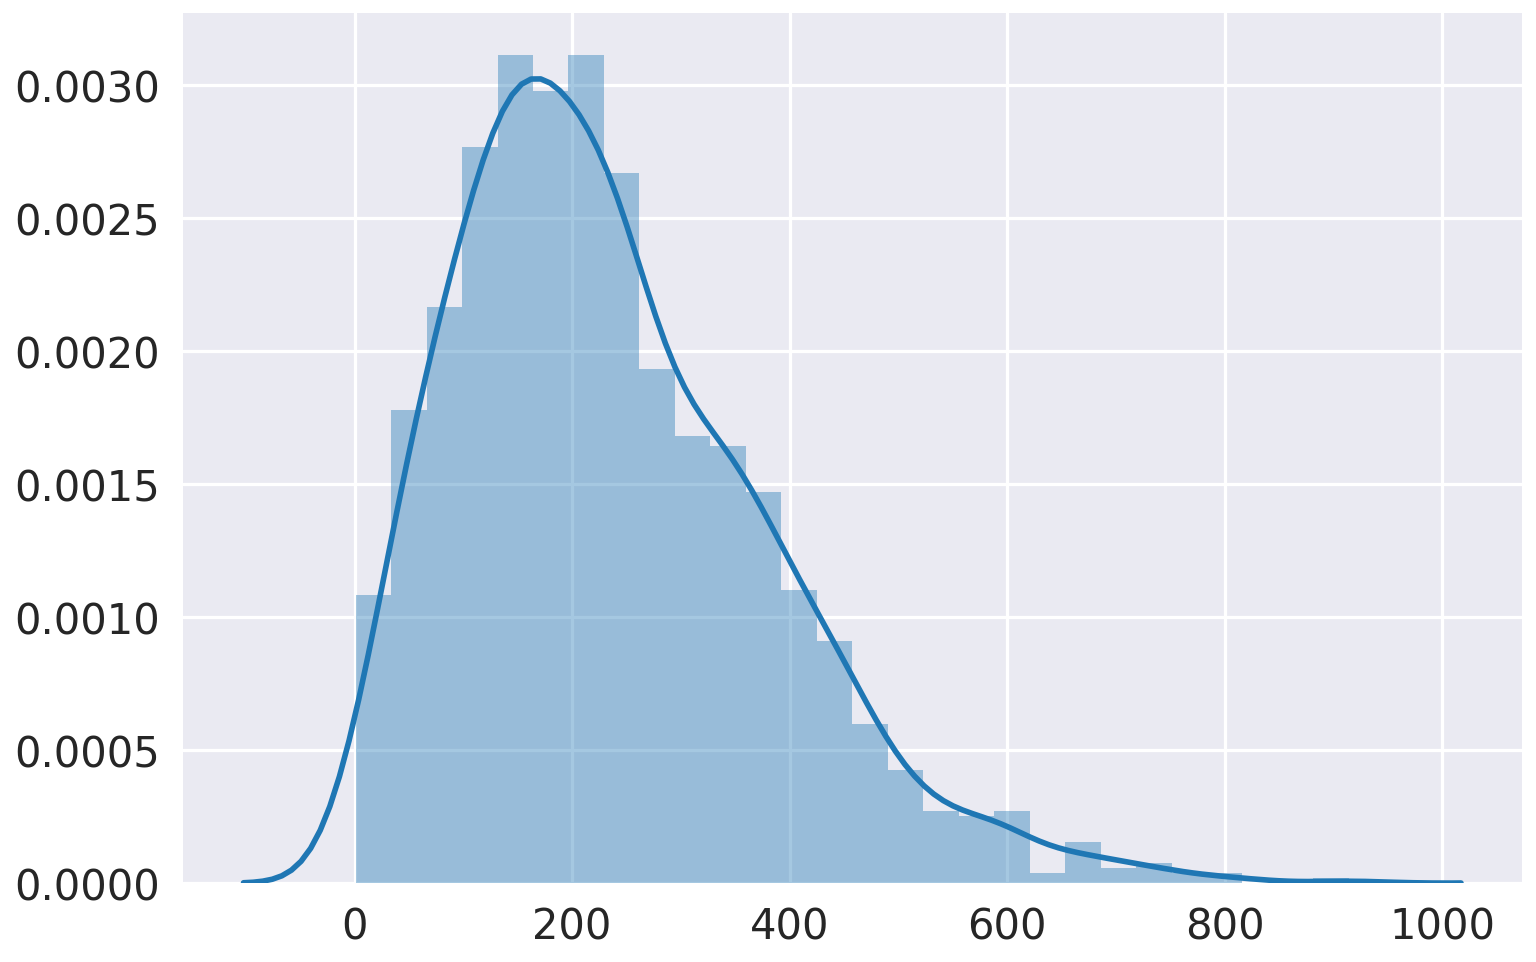

In [8]:
fig,ax = plt.subplots(figsize = (12,8))
sns.distplot(games)

In [9]:
tidy_dyads.groupby(level = 0).count().sort_values('redcard', ascending = False).rename(columns = {'redcard' : 'no. of games refereed'}).head()

no. of games refereed
refNum                       
1214                     5598
2080                     4773
1942                     4469
2398                     4363
3099                     4087

In [10]:
tidy_dyads.groupby(level = 1).sum().sort_values('redcard', ascending = False).rename(columns = {'redcard' : 'no. of games redcards received'})

no. of games redcards received
playerShort                                              
cyril-jeunechamp                                       19
sergio-ramos                                           19
gary-medel                                             16
ballesteros                                            15
juanfran                                               15
marchena                                               14
amorebieta                                             13
richard-dunne                                          12
thiago-motta                                           12
ricardo-costa                                          11
alexis                                                 11
jermaine-jones                                         10
reyes                                                  10
diego-colotto                                          10
zlatan-ibrahimovic                                     10
jonathan-zebina                                        10
maurizio-lanzaro                                       10
dani-alves                                             10
martin-stranzl                                          9
gustavo-cabral                                          9
manuel-iturra                                           9
gary-caldwell                                           9
javier-mascherano                                       9
albelda                                                 9
emre-beloezoglu                                         9
paul-scholes                                            9
nemanja-vidic                                           9
renato-civelli                                          9
sylvain-armand                                          8
fabian-orellana                                         8
...                                                   ...
liassine-cadamuro                                       0
lkay-guendogan                                          0
llorente                                                0
loic-abenzoar                                           0
loris-karius                                            0
lucas-piazon                                            0
lucena                                                  0
knowledge-musona                                        0
kevin-theophile-catherine                               0
jose-campana                                            0
julien-feret                                            0
jose-carlos_4                                           0
joshua-king                                             0
juan-bernat                                             0
juanan                                                  0
juanma_4                                                0
julian-draxler                                          0
julian-riedel                                           0
julian-schuster                                         0
julien-quercia                                          0
kevin-osei                                              0
karim-bellarabi                                         0
karim-benzema                                           0
karim-rekik                                             0
keiren-westwood                                         0
ken-ilsoe                                               0
kevin                                                   0
kevin-gameiro                                           0
kevin-olimpa                                            0
zurutuza                                                0

[1585 rows x 1 columns]

In [11]:
total_ref_games = tidy_dyads.groupby(level=0).size().sort_values(ascending=False)
total_player_games = tidy_dyads.groupby(level=1).size().sort_values(ascending=False)

In [12]:
total_ref_given = tidy_dyads.groupby(level=0).sum().sort_values(ascending=False,by='redcard')
total_player_received = tidy_dyads.groupby(level=1).sum().sort_values(ascending=False, by='redcard')

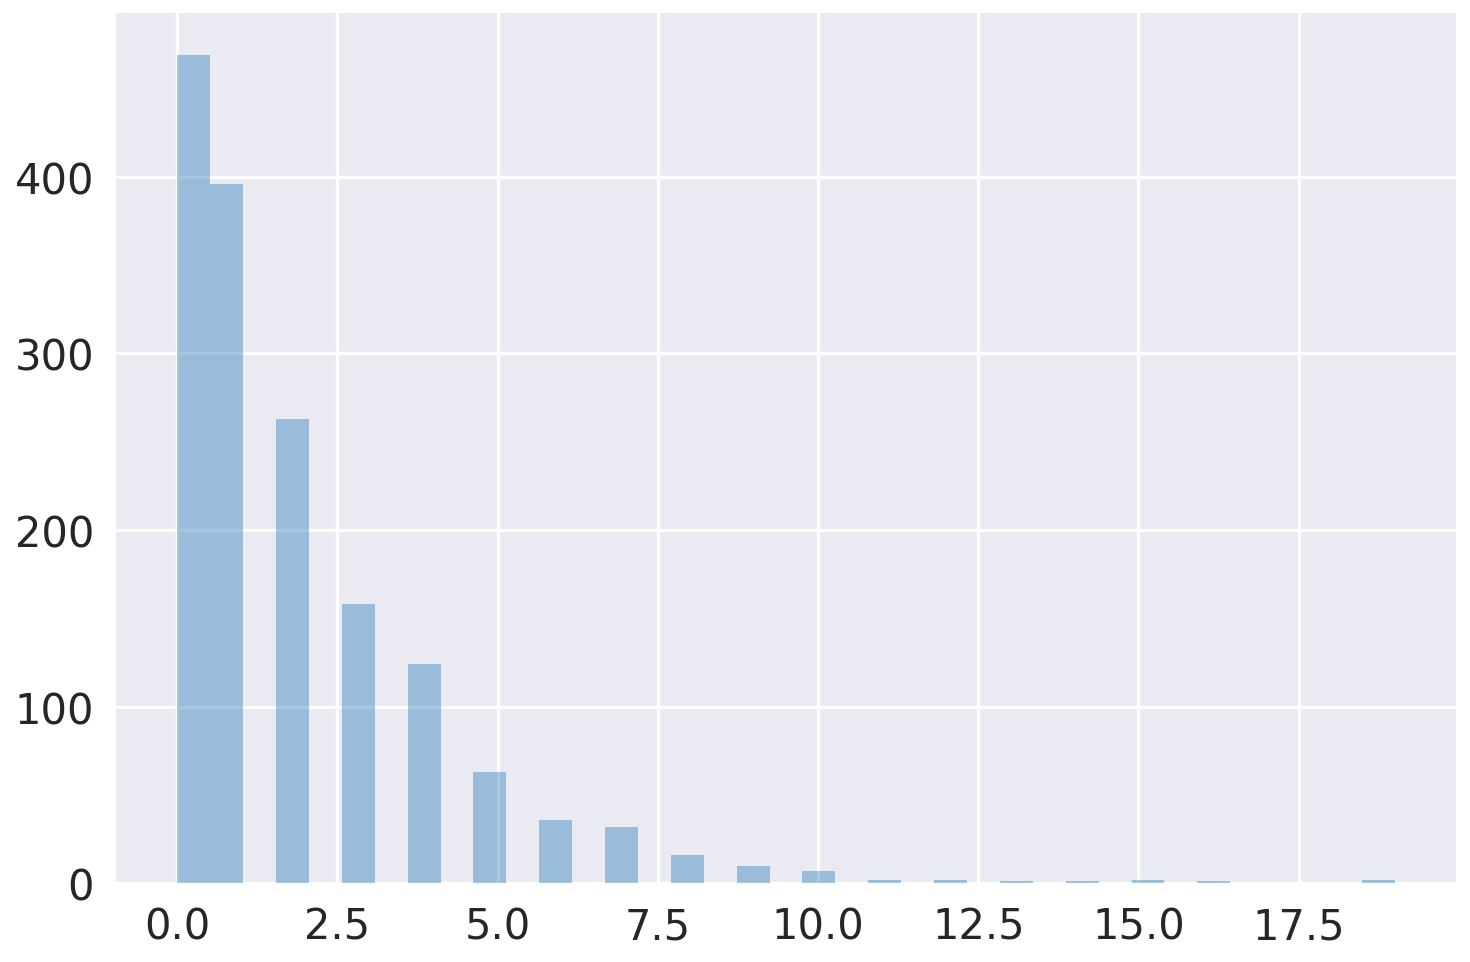

In [21]:
fig,ax = plt.subplots(figsize = (12,8))
sns.distplot(total_player_received, kde=False);

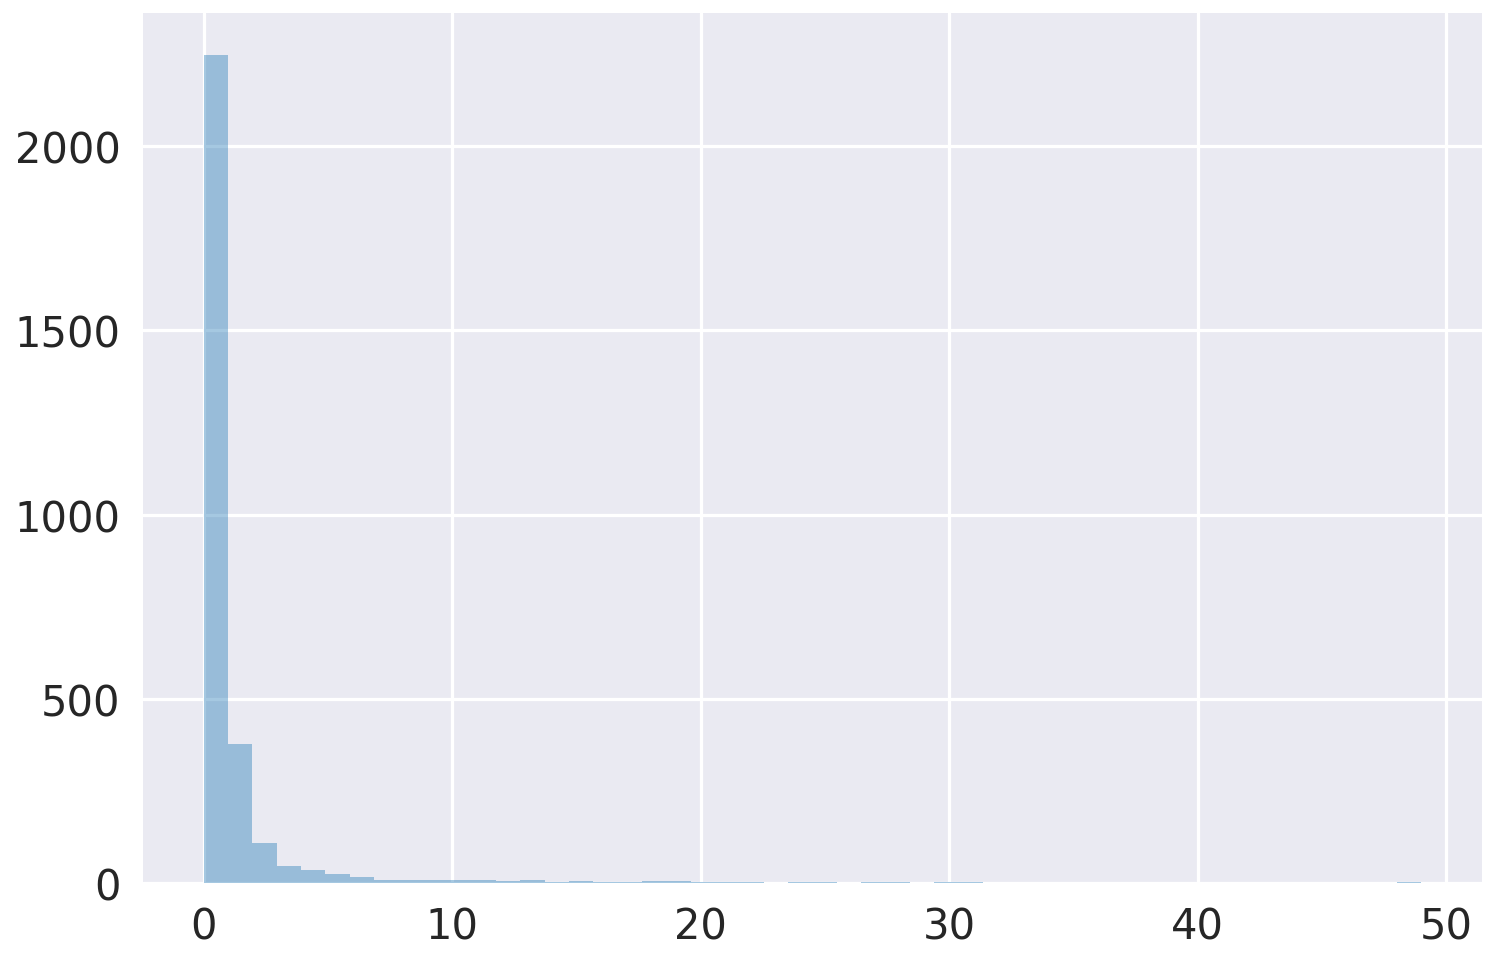

In [22]:
fig,ax = plt.subplots(figsize = (12,8))
sns.distplot(total_ref_given, kde=False);

In [15]:
tidy_dyads.groupby(level=1).sum().sort_values(ascending=False, by='redcard').head()

redcard
playerShort              
cyril-jeunechamp       19
sergio-ramos           19
gary-medel             16
ballesteros            15
juanfran               15

In [16]:
player_ref_game = (tidy_dyads.reset_index()
                               .set_index('playerShort')
                                       .merge(tidy_players,
                                              left_index=True,
                                              right_index=True)
                  )

In [17]:
player_ref_game.head()

refNum  redcard  Unnamed: 0     position  height  weight  \
playerShort                                                              
aaron-hughes       4        0           0  Center Back   182.0    71.0   
aaron-hughes      66        0           0  Center Back   182.0    71.0   
aaron-hughes      77        0           0  Center Back   182.0    71.0   
aaron-hughes      77        0           0  Center Back   182.0    71.0   
aaron-hughes      77        0           0  Center Back   182.0    71.0   

              rater1  rater2  skintone position_agg weightclass  \
playerShort                                                       
aaron-hughes    0.25     0.0     0.125    Defensive  low_weight   
aaron-hughes    0.25     0.0     0.125    Defensive  low_weight   
aaron-hughes    0.25     0.0     0.125    Defensive  low_weight   
aaron-hughes    0.25     0.0     0.125    Defensive  low_weight   
aaron-hughes    0.25     0.0     0.125    Defensive  low_weight   

                heightclass  age_years  
playerShort                             
aaron-hughes  medium_height  33.149897  
aaron-hughes  medium_height  33.149897  
aaron-hughes  medium_height  33.149897  
aaron-hughes  medium_height  33.149897  
aaron-hughes  medium_height  33.149897

In [18]:
bootstrap = pd.concat([player_ref_game.sample(replace=True, 
                                              n=10000).groupby('skintone').mean() 
                       for _ in range(100)])

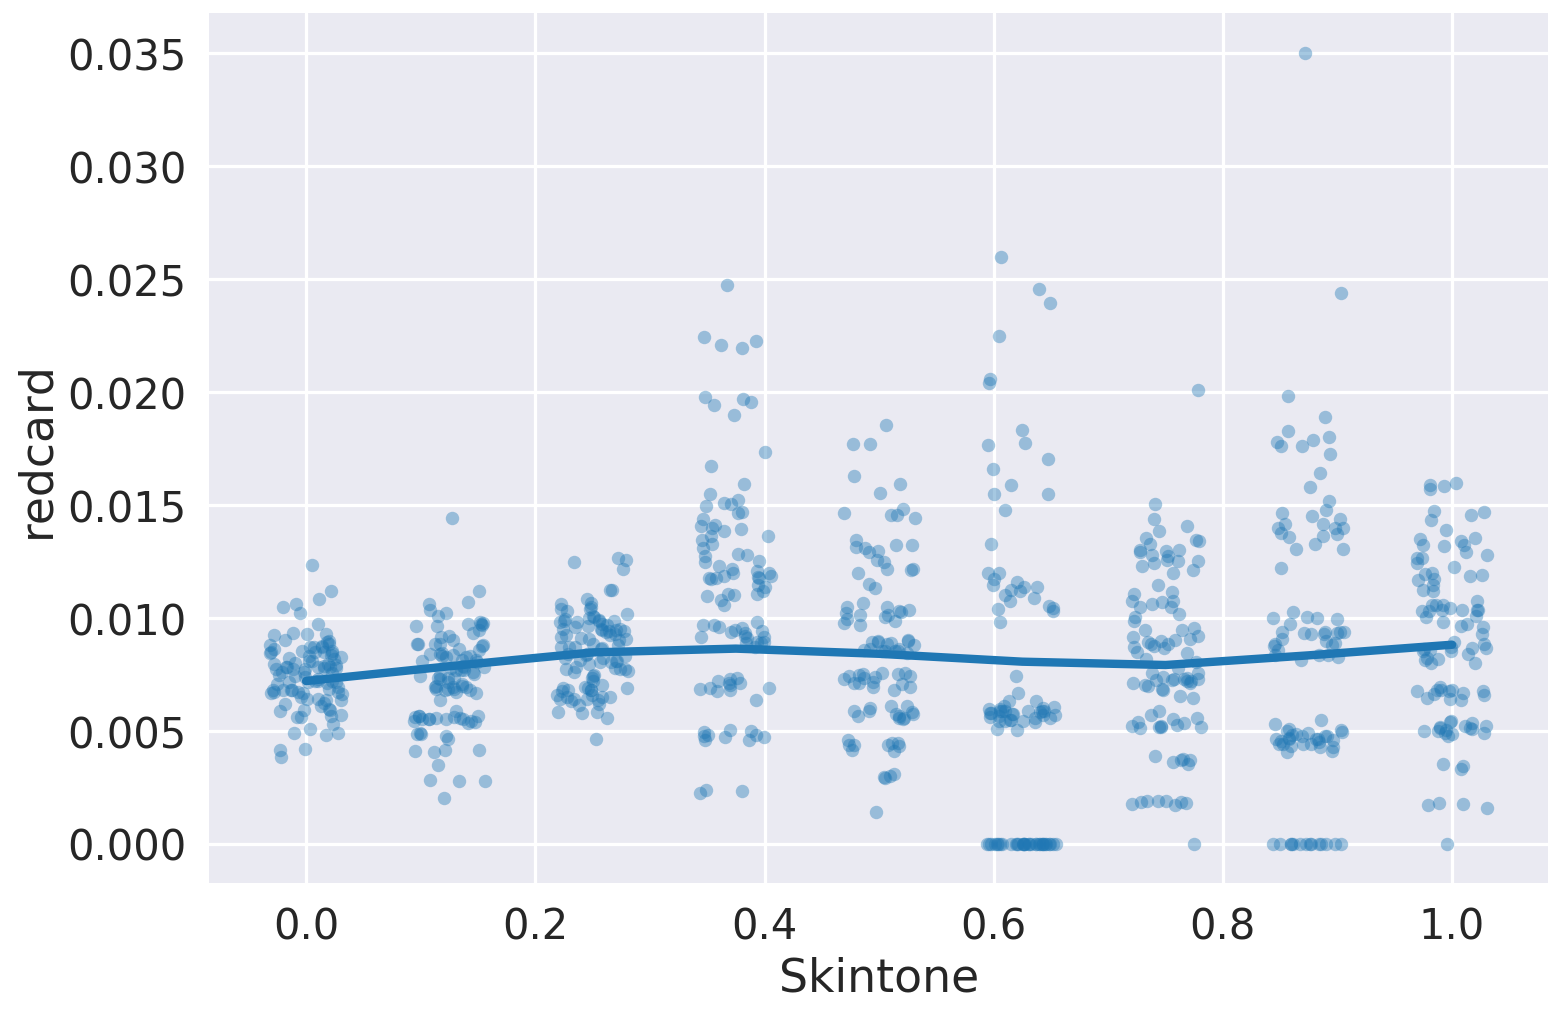

In [31]:
fig, ax = plt.subplots(figsize = (12, 8))
ax = sns.regplot(bootstrap.index.values,
                 y='redcard',
                 data=bootstrap,
                 lowess=True,
                 scatter_kws={'alpha':0.4, 's': 45},
                 x_jitter=(0.125 / 4.0))
ax.set_xlabel("Skintone");